<a href="https://colab.research.google.com/github/tulasinandan/Learning-public/blob/master/StatisticalAnalysisPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical analysis of experimental data using python 

## Contents
- Package imports
- Loading data
- Visualization as an analysis tool
- Data wrangling
- Physics and data
  - Intuition
  - What do the data show?
  - Fitting models
  - Correlations

## Package imports
- Packages developed to perform diverse tasks in python
- Bundled as modules
  - Makes life easy: simply import anything

    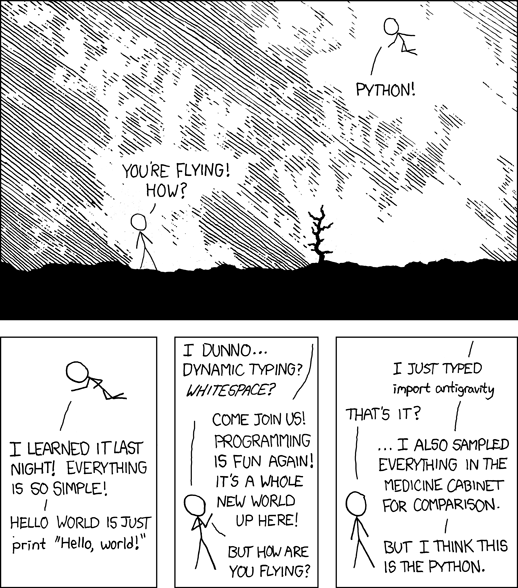
    
    [Explanation](https://www.explainxkcd.com/wiki/index.php/353:_Python)



In [ ]:
# Let us import some modules
import numpy as np                # Numerical python - allows array programming
import scipy as sp                # Scientific python 
import pandas as pd               # Time series analysis package
import seaborn as sns             # Statistical analysis package
import matplotlib.pyplot as plt   # Plotting behemoth

## Loading the data
Once the packages are loaded, we can load the data into python. 

### Data source
We will be using data from the [Voyager spacecraft](https://en.wikipedia.org/wiki/Voyager_program). The Voyagers are about 22 billion kms away, still sending data from the interstellar medium. Light takes more than 22 hours to travel that distance. The data are available for anyone to download from the NASA data archive [CDAWeb](https://cdaweb.gsfc.nasa.gov/).

### The system
Voyagers were sent to explore the outer planets. They collected data on the [solar wind](https://en.wikipedia.org/wiki/Solar_wind) on their way out. The solar wind carves out a bubble, called the heliosphere, in the interstellar medium. We will look at some of the solar wind properties observed by the Voyagers.

### Data into python
Data can be loaded directly as numpy arrays. This is useful for many numerical applications. However, [pandas](https://pandas.pydata.org/) module provides a powerful framework to analyze time series data. Data are represented as time series. Time series are combined to create data frames on which many powerful operations can be done to process data quickly.

In [ ]:
# Load the data file into a two dimensional array directly from the web 
d=np.loadtxt('https://cdaweb.gsfc.nasa.gov/pub/data/voyager/voyager2/merged/voyager2_daily.asc')

In [ ]:
d[:,0]

array([1977., 1977., 1977., ..., 2020., 2020., 2020.])

In [ ]:
# Names for various columns of the two dimensional array
vars=['year','dDay','hr','R','Lat','Long','avB','rmsB','BR','BT','BN','Vsw', 'vTheta','vPhi','np','Tp','flx_lecp1','flx_lecp2','flx_lecp3','flx_crs1', 'flx_crs2','flx_crs3','flx_crs4','flx_crs5','flx_crs6','flx_crs7','flx_crs8', 'flx_crs9','flx_crs10','flx_crs11','flx_crs12','flx_crs13','flx_crs14', 'flx_crs15','flx_crs16','flx_crs17','flx_crs18']
# Create a pandas dataframe with appropritate column names
df=pd.DataFrame(d,columns=vars)

## Visualize data

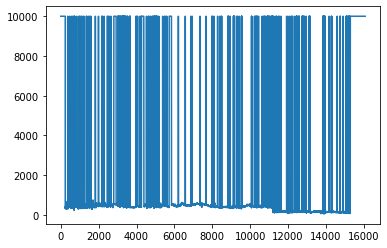

In [ ]:
df.Vsw.plot()

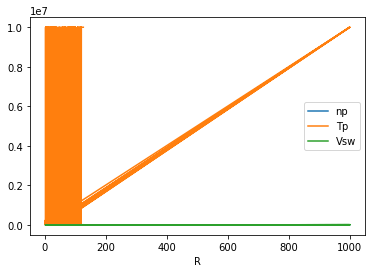

In [ ]:
df.plot(x="R",y=["np","Tp","Vsw"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0795f714c0>,
      dtype=object)

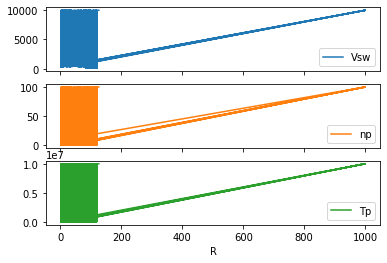

In [ ]:
df.plot(x="R",y=["Vsw","np","Tp"],subplots=True, sharex=True)
# pandas uses matplotlib for creating the plots
# Check out tutorials on plotting with matplotlib

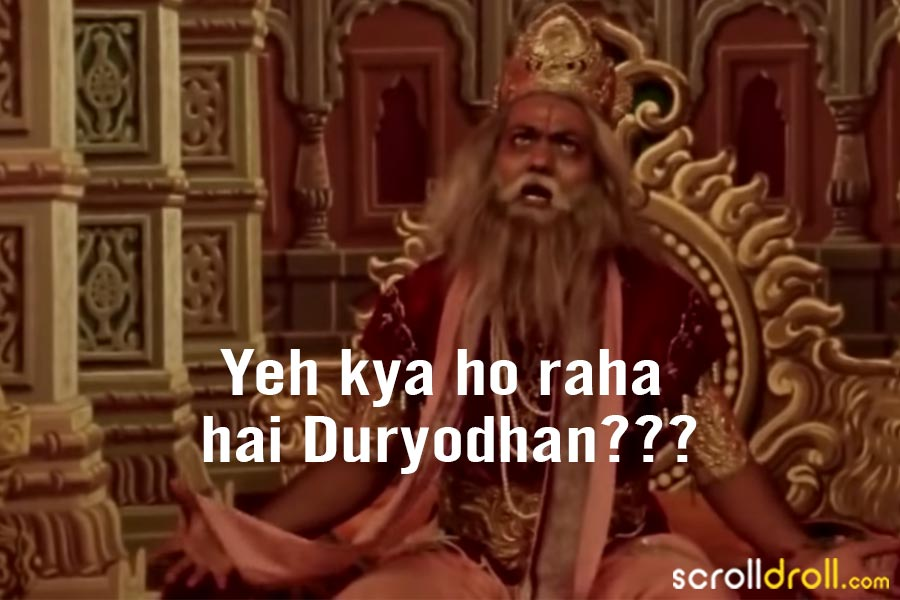

Typically, the datasets are not clean. There are many problems:

- Instrument malfunction
- Communication issues
- bandwidth limitations
- Calibration issues 
- system variavility (seasonal variations, transients, ...)
- mice, bears ...

Fortunately, this dataset has been cleaned. The odd bits that we see are simply bad data flags. We can easily remove them.

In [ ]:
# Replace bad data flags with NaN (not a number) for Pandas to easily handle the data 
for i in [99.99999, 999.99, 999.999, 9999999, 9999.9, 9.999e+05]:
  df.replace(to_replace=i,value=np.NaN,inplace=True) 

count    14290.000000
mean       358.697761
std        142.265716
min         44.600000
25%        170.800000
50%        401.600000
75%        460.000000
max       1029.900000
Name: Vsw, dtype: float64

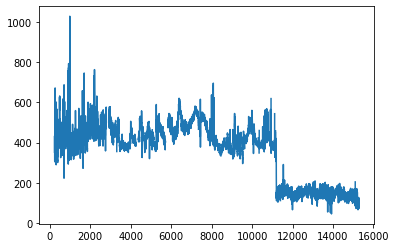

In [ ]:
# Now we get some nice solar wind velocity plots
df.Vsw.plot()
df.Vsw.describe() # statistics

In [ ]:
dff=df[df.R <20][['R','np','Tp','Vsw','rmsB']]
dff.dropna(inplace=True)
dff.head()

,R,np,Tp,Vsw,rmsB
235,1.01,8.77222,37495.0,352.2,7.940
236,1.01,11.11268,126367.0,413.0,7.831
237,1.00,7.36713,91483.0,428.1,4.819
238,1.00,5.16491,85050.0,433.4,5.211
239,1.00,5.67152,66519.0,416.7,3.536


In [ ]:
dff.describe()

,R,np,Tp,Vsw,rmsB
count,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000
mean,9.640282,0.430588,22486.411421,448.781631,0.790473
std,4.899397,1.638026,23374.145831,63.642726,1.030557
min,1.000000,0.001050,828.000000,222.700000,0.036000
25%,5.745000,0.023900,8131.500000,409.900000,0.244500
50%,9.660000,0.058300,14859.000000,445.200000,0.450000
75%,12.890000,0.177865,27366.500000,483.250000,0.852500
max,19.990000,30.192920,238421.000000,1029.900000,10.982000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f078cfc26a0>,
      dtype=object)

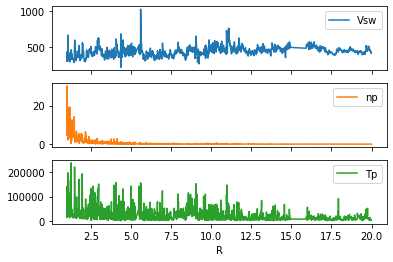

In [ ]:
dff.plot(x="R",y=["Vsw","np","Tp"],subplots=True, sharex=True)

## Intuition versus data
Imagine a spherical shell of wolar wind expanding at a constant speed. The mass contained in that shell is constant. Consider a single species, let's say protons.

$n_{p0} \times 4 \pi r_0^2 dr = n_{p1} \times 4 \pi r_1^2 dr$

$⇒n_{p1} = n_{p0} (\frac{r_0}{r_1})^2$

What do the data tell us?

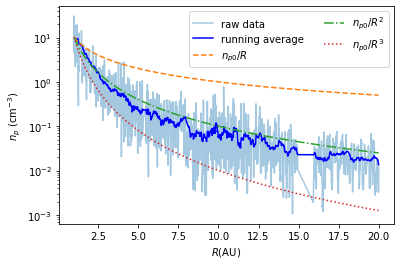

In [ ]:
plt.clf()
plt.semilogy(dff['R'],dff['np'],alpha=0.4,label="raw data")
plt.plot(dff.R,dff.np.rolling(50).mean(),color='b', label="running average")
plt.plot(dff.R,10./dff.R,   '--',label="$n_{p0}/R$")
plt.plot(dff.R,10./dff.R**2,'-.',label="$n_{p0}/R^2$")
plt.plot(dff.R,10./dff.R**3,":" ,label="$n_{p0}/R^3$")
plt.xlabel("$R$(AU)")
plt.ylabel("$n_p$ (cm$^{-3}$)")
plt.legend(ncol=2)

In [ ]:
model=np.polyfit(np.log10(dff.R),np.log10(dff.np),1)
print(model)

[-2.11332372  0.77845062]


In [ ]:
dfr=dff.rolling(50).mean().dropna() # Rolling averages

In [ ]:
model1=np.polyfit(np.log10(dfr.R),np.log10(dfr.np),1)
print(model1)

[-2.06704306  0.87708074]


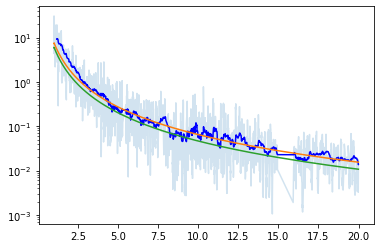

In [ ]:
plt.clf()
plt.semilogy(dff['R'],dff['np'],alpha=0.2)
plt.plot(dff.R,dff.np.rolling(50).mean(),color='b')
plt.plot(dff.R,10**model1[1]*dff.R**model1[0])
plt.plot(dff.R,10**model[1]*dff.R**model[0])

### Going beyond linear fits

In [ ]:
def curve_fit_pwrlaw(dff,a="R",b="np",p0=[10.,2.]):
  """
    dff: dataframe
    a,b : names of the columns for x,y values to fit curve
  """
  from scipy.optimize import curve_fit
  def f(x,*p):
      a,b = p
      return a*x**b
  p0=[10.,2.]
  coefs,var_matrix = curve_fit(f,dff[a],dff[b],p0=p0)

  fig=plt.semilogy(dff[a],dff[b],alpha=0.2,label="raw data")
  plt.plot(dff[a],dff[b].rolling(50).mean(),color='b',label="running mean")
  plt.plot(dff[a],f(dff[a],*coefs),label="fit")
  plt.xlabel(a)
  plt.ylabel(b)
  plt.legend()
  return fig,coefs,var_matrix

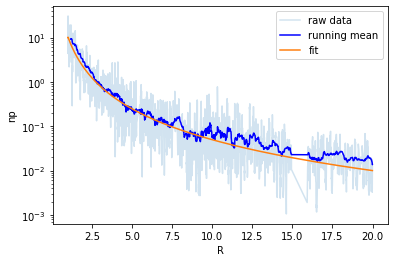

In [ ]:
fig,coefs,var_matrix=curve_fit_pwrlaw(dff,"R","np")

In [ ]:
coefs

array([10.17223897, -2.31269694])

### How about the temperature?
$T V^{\gamma -1} = const$

with $\gamma=5/3$

$T_0 (4\pi r_0^2 dr)^{2/3} = T_1 (4\pi r_1^2 dr)^{2/3}$

$\Rightarrow T_1 = T_0 (\frac{r_0}{r_1})^{4/3}$

What do the data say?

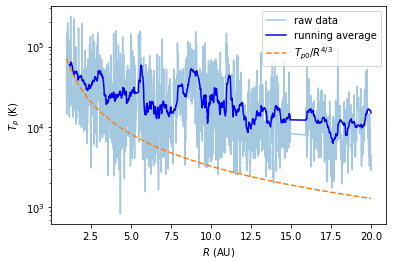

In [85]:
plt.clf()
plt.semilogy(dff['R'],dff['Tp'],alpha=0.4,label="raw data")
plt.plot(dff.R,dff.Tp.rolling(50).mean(),color='b', label="running average")
plt.plot(dff.R,7e4/dff.R**(4/3),   '--',label="$T_{p0}/R^{4/3}$")
plt.xlabel("$R$ (AU)")
plt.ylabel("$T_p$ (K)")
plt.legend()

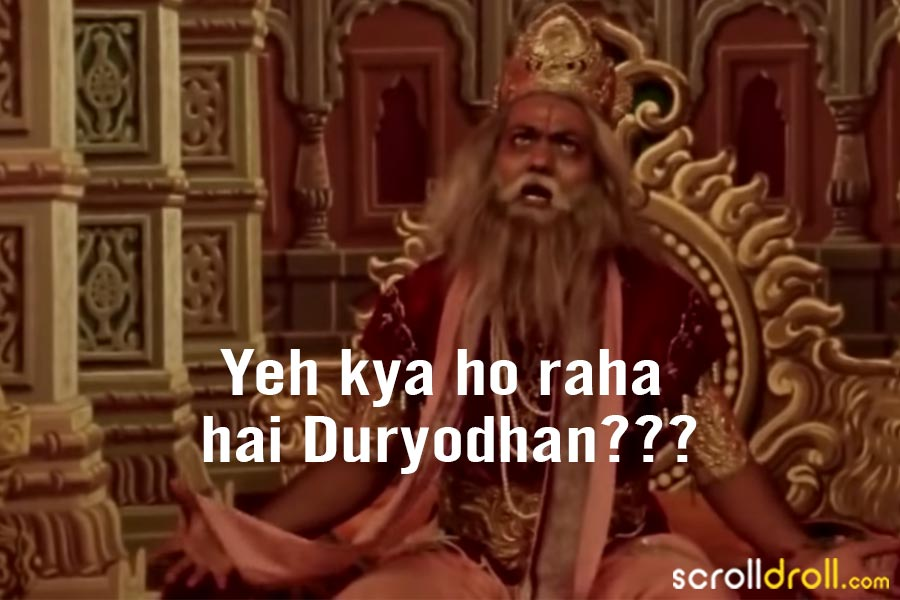

Our intuition has been challenged! The solar wind does not cool like an adiabatic gas. Something keeps it hot!

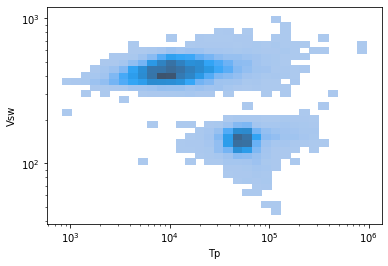

In [ ]:
# Two dimensional histograms show different 
sns.histplot(df,x="Tp",y="Vsw",bins=32,log_scale=(True,True))

In [ ]:
dfr.corr()

,R,np,Tp,Vsw,rmsB
R,1.000000,-0.371859,-0.329815,0.304622,-0.587658
np,-0.371859,1.000000,0.215223,-0.257854,0.737992
Tp,-0.329815,0.215223,1.000000,0.248268,0.497703
Vsw,0.304622,-0.257854,0.248268,1.000000,-0.147567
rmsB,-0.587658,0.737992,0.497703,-0.147567,1.000000


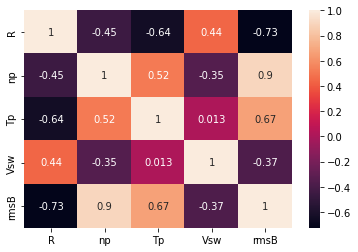

In [ ]:
sns.heatmap(dfr.corr(),annot=True)